In [87]:
import sys
import numpy as np
import random as rm
import matplotlib.pyplot as plt


#part1 load and explore the data

def LoadMusicData(fname,addBias):
    data=np.loadtxt(fname,delimiter=',')
    
    traindata=data[0:463713,:]
    testdata=data[463173:,:]
    trainYears=traindata[:,0]
    testYears=testdata[:,0]
    
    trainBias=addBias*np.ones((463713,1))
    trainVariables= traindata[:,1:]
    trainFeat=np.hstack((trainBias,trainVariables))
    
    testBias=addBias*np.ones((52172,1))
    testVariables= testdata[:,1:]
    testFeat=np.hstack((testBias,testVariables))
    return trainYears,trainFeat,testYears,testFeat
fname="C:/RIT/IMG/Music/YearPredictionMSD.txt"
#fname="/Users/dl/Documents/RIT related/YearPredictionMSD.txt"
trainYears,trainFeat,testYears,testFeat=LoadMusicData(fname,1)  
testYears.shape  #(52172, )
trainFeat

array([[ 1.000000e+00,  4.994357e+01,  2.147114e+01, ..., -1.822230e+00,
        -2.746348e+01,  2.263270e+00],
       [ 1.000000e+00,  4.873215e+01,  1.842930e+01, ...,  1.204941e+01,
         5.843453e+01,  2.692061e+01],
       [ 1.000000e+00,  5.095714e+01,  3.185602e+01, ..., -5.859000e-02,
         3.967068e+01, -6.634500e-01],
       ...,
       [ 1.000000e+00,  4.638102e+01, -1.605772e+01, ...,  1.483900e-01,
        -9.439950e+01, -1.408372e+01],
       [ 1.000000e+00,  4.262982e+01,  1.163038e+01, ...,  2.850070e+00,
         1.068887e+02, -6.253090e+00],
       [ 1.000000e+00,  4.437612e+01,  1.625310e+00, ..., -4.399480e+00,
         2.242941e+01, -4.108930e+00]])

In [88]:
# Part I
#observe data   (463713, 91)
RangeF=[np.min(trainFeat),np.max(trainFeat)]
RangeY=[np.min(trainYears),np.max(trainYears)]
print(RangeF,RangeY)#  [65735.77953, -14861.69535]
#plt.hist(trainYears,50,facecolor='blue', alpha=0.5)   
#plt.hist(testYears,50,facecolor='red', alpha=0.5)# 
#plt.hist([trainYears.ravel(), testYears.ravel()],50,alpha=0.8, label=['trainYears', 'testYears'])
#plt.legend(loc='upper right')
#plt.show()
np.unique(trainYears, return_counts=True) # 2007 is the most

[-14861.69535, 65735.77953] [1922.0, 2011.0]


(array([1922., 1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931.,
        1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940.,
        1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949.,
        1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
        1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
        1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
        1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
        1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
        1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
        2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.]),
 array([    6,     5,     7,    19,    40,    48,    79,    38,    31,
           11,     6,    28,    24,    22,    25,    19,    35,    14,
           31,    21,    13,    14,    27,    29,    55,    38,    53,
           58,    62,    65,   121,   108,   253,   535,   559,   522,
          5

In [89]:
def MusicMSE(pred,gt):
    N=gt.shape[0]      #get total size
    gt=gt.reshape(N,1)
    pred=np.round(pred)
    gt=np.array(gt)
    MSE=np.sum((pred-gt)**2)/N
    return MSE

#A=round(np.mean(testYears))   # 1999
mse_2007=MusicMSE(2007,testYears) #array([189.98296021])
mse_1998=MusicMSE(1998,testYears)  #array([117.98882542])
print(mse_2007)


189.982960208541


In [90]:
# get data 100 examples
#traindata=np.hstack((trainYears[0:100].reshape(100,1),trainFeat[0:100,:]))
#testdata=np.hstack((testYears[0:100].reshape(100,1),testFeat[0:100,:]))
#traindata.shape #(100, 92)

# get data all
traindata=np.hstack((trainYears.reshape(trainYears.shape[0],1),trainFeat))
testdata=np.hstack((testYears.reshape(testYears.shape[0],1),testFeat))
print(testdata.shape)  #(52172, 92)
print(traindata.shape)  #(463713, 92)

traindata.shape  #(463713,)

(52172, 92)
(463713, 92)


(463713, 92)

In [91]:
def normdata (data):         # z-score
    m=np.mean(data,axis=0)   
    #k=np.max(data,axis=0)-np.min(data,axis=0)
    var=np.std(data,axis=0)
    Ndata=(data-m)/var
    return Ndata

def data_processing(data):
    #normalize data and add bias, #data formate first col is label    
    NormD=normdata (data[:,2:data.shape[1]])   
    bias1=np.ones((data.shape[0],1)) 
    B_data=np.c_[bias1,NormD]
    Label=data[:,0]
    return B_data, Label

NormTr,TrainL=data_processing(traindata)
NormTs,TestL=data_processing(testdata)
offset1=np.round(np.mean(TrainL))  #1998
offset2=np.min(TrainL)    #1922
print(offset1, offset2)
traindata.shape


1998.0 1922.0


(463713, 92)

In [92]:
#part2
# compute loss          
def Compute_Ridgeloss (Y,X,W,alpha,mtum,grad_):
    linear=np.round(np.dot(X,W))  
    Y=Y.reshape(len(Y),1)
    Reg=alpha*(np.linalg.norm(W)**2)   # L2 norm
    Loss=np.sum((linear-Y)**2)+Reg   
    grad=mtum*grad_[-1]+2*np.dot(X.T,(linear-Y))+ 2*alpha*W   #    
    return Loss,grad



#def model(tranindata, Epochs, Mini, alpha, rate,mtum):
def Model1(tranindata, Epochs, Mini, alpha, rate,mtum):
    N=traindata.shape[0]       # sample volumes
    BSize=N//Mini 
    grad_=[0]
    Xcol=traindata.shape[1]-1  #1st col is y
    Ycol=1                     #vector
    W=np.random.uniform(low=-1, high=1, size=Xcol*Ycol).reshape(Xcol,Ycol)  # initialize W (X_col dim+1, Y_col dim)
    loss=[]
    
    # train model 
    for m in range(Epochs):
   
        np.random.shuffle(traindata)  #shuffle 
        #normalize data and add bias
        NormTr,TrainL=data_processing(traindata)
        TrainL=TrainL-offset1
        
        # update W in train minibatch
        for i in range(BSize):
            X=NormTr[Mini*i:Mini*(i+1),:]
            Y=TrainL[Mini*i:Mini*(i+1)]
            #Loss,grad=Ridgeloss(Y,X,W,alpha)
            Loss,grad=Compute_Ridgeloss(Y,X,W,alpha,mtum,grad_)
            W=W-rate*grad                   
            grad_=np.append(grad_,grad)        

        #compute Loss 
       
             
        TLoss,grad1=Compute_Ridgeloss(TrainL,NormTr,W,alpha,mtum,grad_)
        loss=np.append(loss,TLoss/N) 
        
        
         #early stopping 
        if m >2 and  loss[-2]-loss[-1]<0.1:
            rate=0.8*rate
            
            if rate< 1e-10:
                break
        print(m,'Epoches--','Loss:',TLoss/N)        
        
    return W, loss
#model(tranindata, Epochs, Mini, alpha, rate,mtum):
WL2,Ridgeloss=Model1(traindata, 50, 300, 0.01, 1e-6,0.1)
WL2.shape

0 Epoches-- Loss: 104.15270257918732
1 Epoches-- Loss: 97.70130922195361
2 Epoches-- Loss: 94.93816919518638
3 Epoches-- Loss: 93.52851505336145
4 Epoches-- Loss: 92.70527318880693
5 Epoches-- Loss: 92.24575844572259
6 Epoches-- Loss: 91.9666311252528
7 Epoches-- Loss: 91.78208600322236
8 Epoches-- Loss: 91.65427423899125
9 Epoches-- Loss: 91.56599985085417
10 Epoches-- Loss: 91.52284171849567
11 Epoches-- Loss: 91.48832254113691
12 Epoches-- Loss: 91.48018605734397
13 Epoches-- Loss: 91.4643098680521
14 Epoches-- Loss: 91.4564666625474
15 Epoches-- Loss: 91.45557603109603
16 Epoches-- Loss: 91.4488067623556
17 Epoches-- Loss: 91.441373288534
18 Epoches-- Loss: 91.43986158031703
19 Epoches-- Loss: 91.43708831539867
20 Epoches-- Loss: 91.43706459553025
21 Epoches-- Loss: 91.4326265069035
22 Epoches-- Loss: 91.4312528134418
23 Epoches-- Loss: 91.43211972979874
24 Epoches-- Loss: 91.43350852051236
25 Epoches-- Loss: 91.43296076843352
26 Epoches-- Loss: 91.43301468150568
27 Epoches-- Loss:

(91, 1)

In [93]:
Ypred_tr=np.round(np.dot(NormTr,WL2)+ offset1)
print(Ypred_tr.ravel())
print(TrainL.ravel())
Ridgeloss

[1997. 1999. 1997. ... 1999. 1999. 1993.]
[1997. 2007. 1997. ... 1981. 2004. 1979.]


array([104.15270258,  97.70130922,  94.9381692 ,  93.52851505,
        92.70527319,  92.24575845,  91.96663113,  91.782086  ,
        91.65427424,  91.56599985,  91.52284172,  91.48832254,
        91.48018606,  91.46430987,  91.45646666,  91.45557603,
        91.44880676,  91.44137329,  91.43986158,  91.43708832,
        91.4370646 ,  91.43262651,  91.43125281,  91.43211973,
        91.43350852,  91.43296077,  91.43301468,  91.43210464,
        91.43069859,  91.43003439,  91.4297217 ,  91.42950389,
        91.42971307,  91.43026514,  91.42991147,  91.42983168,
        91.42947586,  91.42931627,  91.42949095,  91.42939822,
        91.4293896 ,  91.42938744,  91.42939175,  91.42946723,
        91.4294241 ,  91.42966347,  91.42964838,  91.42959015,
        91.42963328,  91.42965916])

In [94]:
def compute_mse(Xtr,Ytr,Xts,Yts,W,offset):
    Ypred_tr=np.round(np.dot(Xtr,W)+offset)
    Ypred_ts=np.round(np.dot(Xts,W)+offset)
    mse_tr=MusicMSE(Ypred_tr,Ytr)
    mse_ts=MusicMSE(Ypred_ts,Yts)
    return mse_tr,mse_ts

Rg_mse_tr,Rg_mse_ts=compute_mse(NormTr,TrainL,NormTs,TestL, WL2, offset1)
print(Rg_mse_tr,Rg_mse_ts)

146.95509722608597 90.638675918117


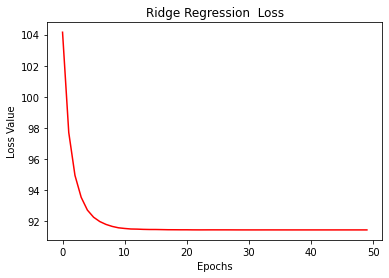

In [120]:
#plot loss 
def plot_loss(loss):    
    A=np.arange(0,loss.shape[0],1)
    plt.plot(A,loss,'-r')    
    #plt.legend('train', loc='upper right') 
    plt.title('Ridge Regression  Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.show()
plot_loss(Ridgeloss)

In [96]:
#trainYears,trainFeat,testYears,testFeat=LoadMusicData(fname,1)  
##pseudoinverse  #X*W=Y   

X_inv=np.linalg.pinv(trainFeat)  #(91, 463713)
WW=np.dot(X_inv,trainYears.reshape(len(trainYears),1))
WW=WW.reshape(len(WW),1)

Y_pred_train1=np.round(np.dot(trainFeat,WW))  #(463713, 1)
Y_pred_test1=np.round(np.dot(testFeat,WW))  #(52172, 1)
mse_rg_tr1=MusicMSE(Y_pred_train1,trainYears)
mse_rg_ts1=MusicMSE(Y_pred_test1,testYears)
print(mse_rg_tr1,mse_rg_ts1)  #[91.34592086] [90.48980296]

91.34592086053227 90.48980295944185


In [143]:
#part3   L1 Weight decay


# compute loss and deltaW         
def Compute_Lassoloss (Y,X,W,alpha,mtum,grad_):
    linear=np.round(np.dot(X,W))  
    Y=Y.reshape(len(Y),1)
    Reg=alpha*np.linalg.norm(W,ord=1)  # L1 norm
    Loss=np.sum((linear-Y)**2)+Reg   
    grad=mtum*grad_[-1]+2*np.dot(X.T,(linear-Y))+ 2*alpha*W   #    
    return Loss,grad

#def model(tranindata, Epochs, Mini, alpha, rate):
def Model2(tranindata, Epochs, Mini, alpha, rate, mtum):
    N=traindata.shape[0]  # sample volumes
    BSize=N//Mini 
    grad_=[0]
    Xcol=traindata.shape[1]-1  #col
    Ycol=1
    W=np.random.uniform(low=-1, high=1, size=Xcol*Ycol).reshape(Xcol,Ycol)  # initialize W (X_col dim+1, Y_col dim)
    Sta_trAcc=[]
    loss=[]
    
    # train model 
    for m in range(Epochs):
   
        np.random.shuffle(traindata)  #shuffle 
         #normalize data and add bias
        NormTr,TrainL=data_processing(traindata)
        TrainL=TrainL-offset1
        # update W in train minibatch
        for i in range(BSize):
            X=NormTr[Mini*i:Mini*(i+1),:]
            Y=TrainL[Mini*i:Mini*(i+1)]
            #Loss,grad=Lassoloss(Y,X,W,alpha)Compute_Lassoloss (Y,X,W,alpha,mtum,grad_
            Loss,grad=Compute_Lassoloss(Y,X,W,alpha,mtum,grad_)
            W=W-rate*grad                   
            grad_=np.append(grad_,grad)        

        #compute Loss of train sets
        TLoss,grad1=Compute_Lassoloss(TrainL,NormTr,W,alpha,mtum,grad_)
        loss=np.append(loss,TLoss/N) 
        
        if m >2 and  loss[-2]-loss[-1]<0.1:
            rate=0.8*rate
            
            if rate< 1e-8:
                break
        print(m,'Epoches--','Loss:',TLoss/N)        
        
    return W, loss

#model(tranindata, Epochs, Mini, alpha, rate, mtum):
WL1,Lassoloss=Model2(traindata, 100, 300, 0.01, 1e-6, 0.01)
print(WL1.shape)

0 Epoches-- Loss: 103.46956481632307
1 Epoches-- Loss: 97.1833101590908
2 Epoches-- Loss: 94.8054234226685
3 Epoches-- Loss: 93.58907195146188
4 Epoches-- Loss: 92.88461037308318
5 Epoches-- Loss: 92.44815292424231
6 Epoches-- Loss: 92.1461040386008
7 Epoches-- Loss: 91.95581393206956
8 Epoches-- Loss: 91.82465091422242
9 Epoches-- Loss: 91.71315307358913
10 Epoches-- Loss: 91.62517840344483
11 Epoches-- Loss: 91.58898576056038
12 Epoches-- Loss: 91.55452263493605
13 Epoches-- Loss: 91.53699455278243
14 Epoches-- Loss: 91.52831892970488
15 Epoches-- Loss: 91.5167988745269
16 Epoches-- Loss: 91.50729083936726
17 Epoches-- Loss: 91.5050265086221
18 Epoches-- Loss: 91.49797689019857
19 Epoches-- Loss: 91.49783024827086
20 Epoches-- Loss: 91.4927948065061
21 Epoches-- Loss: 91.49365093982927
22 Epoches-- Loss: 91.49133053931533
23 Epoches-- Loss: 91.48731512481683
24 Epoches-- Loss: 91.48564383260285
25 Epoches-- Loss: 91.48434992895854
26 Epoches-- Loss: 91.48185269478232
27 Epoches-- Los

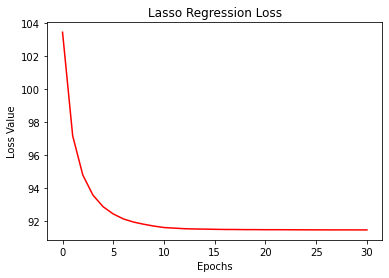

147.02460142372544 90.65295560837231


In [145]:
#plot Lasso loss and Mse
def plot_loss_1(loss):    
    A=np.arange(0,loss.shape[0],1)
    plt.plot(A,loss,'-r')    
    #plt.legend('train', loc='upper right') 
    plt.title('Lasso Regression Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.show()
    
plot_loss_1(Lassoloss)
La_mse_tr,La_mse_ts=compute_mse(NormTr,TrainL,NormTs,TestL, WL1, offset1)
print(La_mse_tr,La_mse_ts)

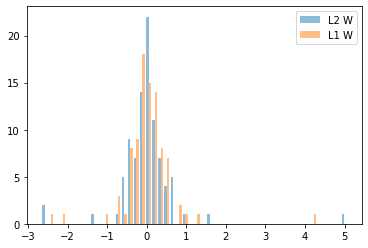

In [101]:
#compare WL2, WL1 and discuss
plt.hist([WL2.ravel(), WL1.ravel()],50,alpha=0.5, label=['L2 W', 'L1 W'])
plt.legend(loc='upper right')
plt.show()
 

In [102]:
MaxV=np.max(trainFeat[:,1:],axis=0)
#Norm=traindata[:,1:]-MaxV
#Norm[:,2:]

trainYears=trainYears.reshape(len(trainYears),1)
trainYears.shape

(463713, 1)

In [103]:
traindata.shape


(463713, 92)

In [ ]:
# part4  Poisson Regression
def normdata_p (data):         # 
    m=np.max(data,axis=0)   
    k=np.max(data,axis=0)-np.min(data,axis=0)
    #var=np.std(data,axis=0)
    Ndata=(data-m)/k
    return Ndata

def data_processing_p(data):  
    #normalize data and add bias, #data formate first col is label    
    NormD=normdata_p(data[:,2:data.shape[1]])   
    bias1=np.ones((data.shape[0],1)) 
    B_data=np.c_[bias1,NormD]
    Label=data[:,0]
    return B_data, Label

def Compute_Poissonloss(Y,X,W,mtum,grad_):
    Y=Y.reshape(len(Y),1)    
    linear=np.exp(np.dot(X,W))
    Loss=np.sum(linear-Y*np.dot(X,W))
    grad=mtum*grad_[-1]+np.dot(X.T,linear)-np.dot(X.T,Y)
    return Loss,grad 



#def model(tranindata, Epochs, Mini, alpha, rate):
def Model3(tranindata, Epochs, Mini, rate,mtum):
    N=traindata.shape[0]  # sample volumes
    BSize=N//Mini 
    grad_=[0]
    Xcol=traindata.shape[1]-1  #col 91
    Ycol=1
    W=np.random.uniform(low=-1, high=1, size=Xcol*Ycol).reshape(Xcol,Ycol)  # initialize W (X_col dim+1, Y_col dim)
    loss=[]
    
    # train model 
    for m in range(Epochs):
   
        np.random.shuffle(traindata)  #shuffle 
         #normalize data and add bias
        NormTr,TrainL=data_processing_p(traindata)
        TrainL=TrainL-offset2
        #update W in train minibatch
        for i in range(BSize):
            X=NormTr[Mini*i:Mini*(i+1),:]
            Y=TrainL[Mini*i:Mini*(i+1)]
            Loss,grad=Compute_Poissonloss (Y,X,W,mtum,grad_)
            W=W-rate*grad                   
            grad_=np.append(grad_,grad)        

        #compute Loss of train sets
        TLoss,grad1=Compute_Poissonloss (TrainL,NormTr,W,mtum,grad_)
        loss=np.append(loss,TLoss/N) 
        
        if m >2 and  loss[-2]-loss[-1]<1:
            rate=0.8*rate
            
            if rate< 1e-11:
                break
        print(m,'Epoches--','Loss:',TLoss/N)        
        
    return W, loss

#model(tranindata, Epochs, Mini, rate, mtum):
W3,Poissonloss=Model3(traindata, 50, 200, 1e-10, 0.01)

W3.shape

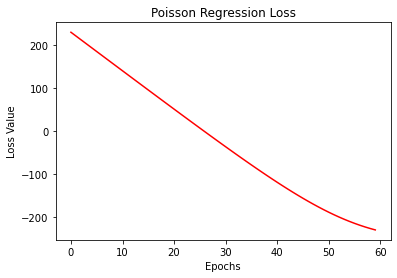

In [135]:
#plot Lasso loss and Mse
def plot_loss_2(loss):    
    A=np.arange(0,loss.shape[0],1)
    plt.plot(A,loss,'-r')    
    #plt.legend('train', loc='upper right') 
    plt.title('Poisson Regression Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.show()
    
plot_loss_2(Poissonloss)

In [136]:


def MusicMSE(pred,gt):
    N=gt.shape[0]      #get total size
    gt=gt.reshape(N,1)
    pred=np.round(pred)
    gt=np.array(gt)
    MSE=np.sum((pred-gt)**2)/N
    return MSE

#MSE
NormTr_P,TrainL_P=data_processing_p(traindata)
NormTs_P,TestL_P=data_processing_p(testdata)

Ypred1=np.round(np.exp(np.dot(NormTr_P,W3))+offset2)
Ypred2=np.round(np.exp(np.dot(NormTs_P,W3))+offset2)
P_mse_tr=MusicMSE(Ypred1,TrainL_P)
P_mse_ts=MusicMSE(Ypred2,TestL_P)


print(Ps_mse_tr,Ps_mse_ts)


5356.160008453505 5377.991106340566


In [138]:
#part 5 softmax classification  ##softmax

def onehot_encode(Label, Baseline):   # all into 89 dims    
    BaseDim=np.unique(Baseline)       
    L=np.zeros((len(Label),len(BaseDim)))
    for i in range(len(Label)):  
        for j in range(len(BaseDim)):
            if Label[i]==BaseDim[j]:
                L[i,j]=1
    return L


#onehot_encode(traindata[:,0],trainYears).shape

def normdata_s (data):         # normalize data to (-1,1)
    m=np.mean(data,axis=0)   
    #k=np.max(data,axis=0)-np.min(data,axis=0)
    var=np.std(data,axis=0)
    Ndata=(data-m)/var
    return Ndata
#Xnorm=normdata (X)   #(10000, 3072)


def softmax(x):
    exp_x=np.exp(x-np.max(x))
    partition=np.sum(exp_x,axis=1,keepdims=True)
    return exp_x/partition
       
def softloss (Y,X,W,grad_,alpha,mtum):
    
    linear=np.dot(X,W)         
    P=softmax(linear)
    Reg=0.5*alpha*(np.linalg.norm(W)**2)   # L2 norm
    SoftLoss=-np.sum(Y*np.log(P))+Reg    
    grad=mtum*grad_[-1]+np.dot(X.T,(P-Y))+alpha*W   #    
    return SoftLoss,grad


def data_processing_s(data):
    #normalize data and add bias, #data formate first col is label    
    NormD=normdata_s (data[:,2:data.shape[1]])   
    bias1=np.ones((data.shape[0],1)) 
    B_data=np.c_[bias1,NormD]
    Label=onehot_encode(data[:,0],trainYears) 
    return B_data, Label

def Model4(tranindata,Baseline, Epochs, Mini, alpha, rate, mtum):
    N=traindata.shape[0]  # 
    BSize=N//Mini 
    grad_=[0]
    Xcol=traindata.shape[1]-1  #col
    Ycol=89
    W=np.random.uniform(low=-1, high=1, size=Xcol*Ycol).reshape(Xcol,Ycol) 
    loss=[]
    
    # train model 
    for m in range(Epochs):
   
        np.random.shuffle(traindata)  #shuffle          
        NormTr,TrainL=data_processing_s(traindata)  #normalize data and add bias

        # update W in train minibatch  
        for i in range(BSize):
            X=NormTr[Mini*i:Mini*(i+1),:]
            Y=TrainL[Mini*i:Mini*(i+1),:]
            Loss,grad=softloss(Y,X,W,grad_,alpha,mtum)
            W=W-rate*grad                   
            grad_=np.append(grad_,grad)        

         #Loss and Accuracy compute of train sets
            
        TLoss,grad1=softloss(TrainL,NormTr,W,grad_,alpha,mtum)
        loss=np.append(loss,TLoss/N)


        
        print(m,'Epoches--','Loss:',TLoss/N)
        
    return W, loss


#train model ---Model4(tranindata, Epochs, Mini, alpha, rate, mtum)
W4, SoftmaxLoss =Model4(traindata, trainYears, 20, 300, 0.001, 1e-6, 0.01)
W4.shape

0 Epoches-- Loss: 12.060990656248876
1 Epoches-- Loss: 11.950094194939155
2 Epoches-- Loss: 11.844654541379574
3 Epoches-- Loss: 11.743877357423436
4 Epoches-- Loss: 11.647126261319496
5 Epoches-- Loss: 11.55389962747051
6 Epoches-- Loss: 11.463776002021415
7 Epoches-- Loss: 11.376432826503404
8 Epoches-- Loss: 11.29158628913802


KeyboardInterrupt: 

In [ ]:
#plot Lasso loss and Mse
plot_loss(SoftmaxLoss)           


In [ ]:
#compute softmax MSE

NormTr_s,TrainL_s=data_processing_s(traindata)
NormTs_s,TestL_s=data_processing_s(testdata)

Ptr=softmax(np.dot(NormTr_s,W4)) # 100*89  
level=np.unique(trainYears)                      
Ypred_tr=level[np.argmax(Ptr, axis=1)].reshape(len(Ptr),1)
Pts=softmax(np.dot(NormTs_s,W4))                      
Ypred_ts=level[np.argmax(Pts, axis=1) ].reshape(len(Pts),1)

Sf_mse_tr=MusicMSE(Ypred_tr,traindata[:,0])
Sf_mse_ts=MusicMSE(Ypred_ts,testdata[:,0])

#print(Ypred_tr.ravel())
#print(TrainL.ravel())
print(Sf_mse_tr,Sf_mse_ts)